In [1]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
import scipy.signal as signal
import numpy as np

from IPython.display import Audio, display, HTML
from ipywidgets import interact

from scipy.io import wavfile
import requests

%matplotlib inline
matplotlib.rcParams['animation.writer'] = 'avconv'
matplotlib.rcParams['figure.figsize'] = "8,3"

In [2]:
Fs = 5      # the sampling frequency
F_plot = 100  # the frequency used for plotting the time-continuous curves
T = 2       # the time-span we'll cover
t = np.arange(0, T, 1/Fs)  # the sample times
t_plot = np.arange(0, t.max(), 1/F_plot)  # time instants for plotting


def showAlias(f1):
    plt.gcf().clear()
    f2 = min(f1, Fs-f1)  # determine the alias frequency
    xt1 = lambda t: np.cos(2*np.pi*f1*t) # create both sine-functions
    xt2 = lambda t: np.cos(2*np.pi*f2*t)
    
    # plot the signals
    plt.subplot(121)
    plt.plot(t_plot, xt1(t_plot), 'b-', lw=2, label='input signal')
    plt.stem(t, xt1(t), label='sampled points')
    plt.plot(t_plot, xt2(t_plot), 'g-', label='after sampling')
    plt.ylim((-1.1, 1.5)); plt.grid(True)
    plt.legend(fontsize=8)
    plt.xlabel('$t$'); plt.ylabel('$x(t), x[n]$')
    
    # plot the spectrum of the signals
    t_freq = np.arange(0, 20*T, 1/F_plot) 
    x1 = xt1(t_freq)
    x2 = xt2(t_freq)
    X1 = np.fft.fftshift(np.fft.fft(x1, 8*len(x1))) / len(x1)
    X2 = np.fft.fftshift(np.fft.fft(x2, 8*len(x1))) / len(x2)
    f = np.linspace(-F_plot/2, F_plot/2, len(X1), endpoint=False)
    plt.subplot(122)
    plt.plot(f, abs(X1), lw=2, label='input')
    plt.plot(f, abs(X2), label='after sampling')
    plt.legend(loc='upper left', fontsize=8)
    plt.xlim((-Fs, Fs))
    plt.axvline(-Fs/2, color='k', ls='--', lw=2)
    plt.axvline(Fs/2, color='k', ls='--', lw=2)
    plt.ylim((-0.1, 1.1))
    plt.grid(True)
    plt.text(x=2.5, y=0.8, s='$f_{in}=%.2f$\n$f_{out}=%.2f$' % (f1, f2), bbox=dict(facecolor='white'))
    plt.xlabel('$f$'); plt.ylabel('$|X(f)|$')
    plt.show()

In [3]:
def presentAliasingAudio(original, rate, factor):
    down_aliased = original[::factor] # dumb downsampling, no anti-aliasing

    b = signal.firwin(155, 1.0/factor-0.01); a=1  # design the AAF
    lowpass = signal.lfilter(b, a, original)      # apply the AAF
    down_nonaliased = lowpass[::factor]           # perform Downsampling

    display(HTML("Original:"), Audio(data=original, rate=rate))
    display(HTML("With Aliasing:"), Audio(data=down_aliased, rate=rate/factor))
    display(HTML("Without Aliasing:"), Audio(data=down_nonaliased,rate=rate/factor))

In [4]:
def loadAudio(url, start, length):
    R = requests.get(url)
    with open("sound.mp3", "wb") as f:
        f.write(R.content)
    !ffmpeg -y -i sound.mp3 sound.wav > /dev/null
    rate, data = wavfile.read("sound.wav")
    if len(data.shape) > 1:
        data = data.sum(axis=1)
    data = (1.0 * data / abs(data).max()).astype(np.float32)
    
    return rate, data[rate*start+np.arange(rate*length)]

In [7]:
plt.figure()
interact(showAlias, f1=(0,5., 0.01));

<Figure size 576x216 with 0 Axes>

interactive(children=(FloatSlider(value=2.5, description='f1', max=5.0, step=0.01), Output()), _dom_classes=('…

NameError: name 'data_chirp' is not defined

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


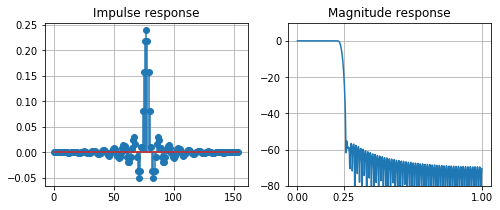

In [8]:
factor = 4  # the downsampling factor
b = signal.firwin(155, 1.0/factor-0.01); a=1  # design the filter
w, H = signal.freqz(b, a) # calculate frequency response

plt.subplot(121)
plt.stem(b)
plt.grid(True); plt.title('Impulse response')

plt.subplot(122)
plt.plot(w/np.pi, 20*np.log10(abs(H)))
plt.grid(True)
plt.xticks([0, 1/factor, 1]);
plt.ylim((-80, 10)); plt.title("Magnitude response");

NameError: name 'data_voice' is not defined

In [10]:
Fs = 44100
t = np.arange(0, 10, 1/Fs)
f = 200
data_chirp = np.sin(2*np.pi*f*t*t)
rate_chirp = Fs
presentAliasingAudio(data_chirp, rate_chirp, 10)

In [11]:
presentAliasingAudio(data_chirp, rate_chirp, 10)

In [12]:
url_voice = "http://ia800200.us.archive.org/21/items/adventures_of_dog_1101_librivox/adventuresofadog_00_elwes.mp3"
url_music = "http://www.scientificinvesting.eu/a/Mozart%20-%20Symphony%20n.10%20K.74%20in%20G%20-%201%20Allegro.mp3"
rate_voice, data_voice = loadAudio(url_voice, 40, 10)
rate_music, data_music = loadAudio(url_music, 40, 10)

The system cannot find the path specified.


FileNotFoundError: [Errno 2] No such file or directory: 'sound.wav'

In [ ]:
# to call this function, the code below needs to be executed before
presentAliasingAudio(data_voice, rate_voice, 6)

In [ ]:
presentAliasingAudio(data_music, rate_music, 6)